In [100]:
import pickle as pickel
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%config InlineBackend.figure_format = 'svg'

In [101]:
base_path = './ckpts/ckpts-through-time'
parameter_paths = ['pretrain_chess.pt', 'finetune_chess.pt', 'pretrain_english.pt'] # + ['finetune_commentary.pt']

In [102]:
def get_mean_diff_by_idx(analytics):
    diffs = [analytics['bot_scores'][i] - analytics['comp_scores'][i] for i in range(len(analytics['bot_scores']))]
    max_length = max([game.size for game in diffs])

    diff_vec = np.empty((len(diffs), max_length))
    diff_vec.fill(np.nan)

    for i, diff in enumerate(diffs):
        diff_vec[i, :diff.size] = diff

    mean_diff_by_idx = np.nanmean(diff_vec, axis=0)

    return mean_diff_by_idx

def plot_mean_diff_by_idx(analytics, avg_window_size=1, title="", max_length=None):

    mean_diff_by_idx = get_mean_diff_by_idx(analytics)

    # convolve to get moving avg
    out = np.convolve(mean_diff_by_idx, np.ones(avg_window_size)/avg_window_size)

    # TODO: window-wise standard-deviation?

    plt.plot(out[:max_length], '.-', label=path.split('.pt')[0])
    plt.xlabel("Game move index")
    plt.title(title)
    if avg_window_size == 1:
        plt.ylabel("Avg Chept - Computer Score")
    else:
        plt.ylabel(f"Avg Chept - Computer Score \n [{avg_window_size} idx moving avg]")
    plt.legend()


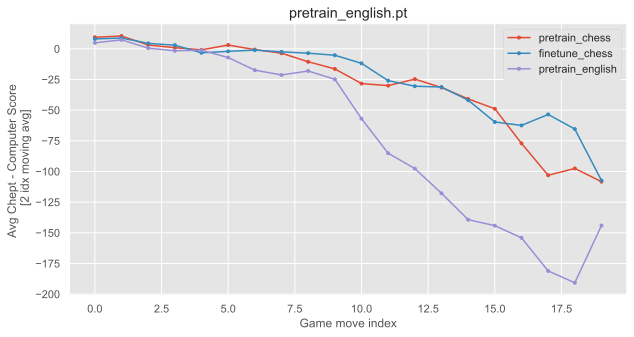

In [103]:
plt.style.use('ggplot')

# plot the different curves for different checkpoints
fig = plt.figure(figsize=(10, 5))
for path in parameter_paths:
    with open(f'anal_{path}.anal', 'rb') as f:
        analytics = pickel.load(f)
    plot_mean_diff_by_idx(analytics, avg_window_size=2, title=path, max_length=20)
plt.show()

In [107]:
analytics.keys()

dict_keys(['total_games', 'first_illegal_move', 'average_first_illegal_move', 'num_wins', 'num_losses', 'num_stalemates', 'resignations', 'checkmates', 'avg_game_length', 'bot_scores', 'comp_scores', 'MPS_full', 'MPS_early', 'MPS_mid', 'MPS_late'])

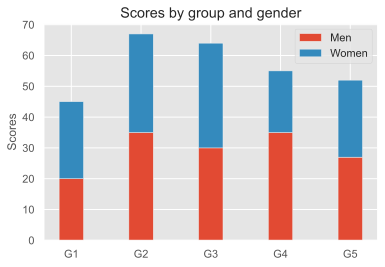

In [109]:
# TODO: make this wins/losses/resignations for each param set

labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 35, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, men_means, width, label='Men')
ax.bar(labels, women_means, width, bottom=men_means,
       label='Women')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()